In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats 

%matplotlib inline

In [2]:
df = pd.read_sas('P_DR1IFF.XPT')

In [3]:
fat_df = df[['SEQN','DR1ISUGR','DR1IPROT','DR1ICARB','DR1ITFAT','DR1IMFAT','DR1IPFAT','DR1ISFAT']]
fat_df

,SEQN,DR1ISUGR,DR1IPROT,DR1ICARB,DR1ITFAT,DR1IMFAT,DR1IPFAT,DR1ISFAT
0,109263.0,2.130000e+00,1.211000e+01,5.070000e+00,4.950000e+00,2.105000e+00,9.480000e-01,1.472000e+00
1,109263.0,1.040000e+01,2.200000e+00,1.203000e+01,5.090000e+00,1.255000e+00,5.340000e-01,2.659000e+00
2,109263.0,8.520000e+00,2.711000e+01,7.933000e+01,2.306000e+01,6.207000e+00,4.001000e+00,1.062700e+01
3,109263.0,2.117000e+01,1.900000e-01,2.371000e+01,5.200000e-01,1.300000e-02,8.200000e-02,4.600000e-02
4,109263.0,1.302000e+01,3.550000e+00,1.383000e+01,5.920000e+00,2.401000e+00,1.324000e+00,1.557000e+00
...,...,...,...,...,...,...,...,...
183905,124821.0,6.980000e+00,5.397605e-79,6.980000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
183906,124821.0,1.270000e+00,3.070000e+00,1.671000e+01,6.400000e+00,1.616000e+00,2.838000e+00,1.487000e+00
183907,124821.0,3.900000e-01,4.960000e+00,2.068000e+01,2.200000e+00,4.110000e-01,7.790000e-01,3.690000e-01
183908,124821.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [4]:
# Each of these amounts is measured in grams and are calculated from the food intake of each participant over a 24 hour period 
fat_df.columns = ['SEQN','total_sugars','total_protein', 'total_carbs','total_fat','monounsaturated_fat','polyunsaturated_fat','saturated_fat']

fat_df.head()

,SEQN,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
0,109263.0,2.13,12.11,5.07,4.95,2.105,0.948,1.472
1,109263.0,10.40,2.20,12.03,5.09,1.255,0.534,2.659
2,109263.0,8.52,27.11,79.33,23.06,6.207,4.001,10.627
3,109263.0,21.17,0.19,23.71,0.52,0.013,0.082,0.046
4,109263.0,13.02,3.55,13.83,5.92,2.401,1.324,1.557


In [5]:
fat_df = fat_df.groupby('SEQN').sum().reset_index()
fat_df['SEQN'] = fat_df['SEQN'].astype(int)

In [6]:
fat_df.head(5)

,SEQN,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
0,109263,73.42,52.79,187.65,48.82,15.420,9.510,18.660
1,109264,27.86,55.55,121.68,37.63,13.896,12.426,7.861
2,109265,157.08,57.47,246.53,80.63,28.231,12.957,33.562
3,109266,94.20,52.58,217.69,73.81,25.513,19.171,22.175
4,109269,84.83,24.96,159.99,57.81,16.084,22.317,15.273


In [7]:
# upload diabetes dataset which has whether each participant is diabetic or not
diabetes_df = pd.read_sas('P_DIQ.XPT')

In [8]:
diabetes_df['DIQ010'] = diabetes_df['DIQ010'].astype(int)
diabetes_df['SEQN'] = diabetes_df['SEQN'].astype(int)

In [9]:
diabetes_df 

,SEQN,DIQ010,DID040,DIQ160,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,...,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,109263,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264,2,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109267,2,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,124818,2,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14982,124819,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14983,124820,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14984,124821,3,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
diabetes_df = diabetes_df[(diabetes_df['DIQ010'] == 2) | (diabetes_df['DIQ010'] == 1)]

In [11]:
# diabetes_df is cleaned 
diabetes_df = diabetes_df.iloc[:,:2]
diabetes_df.head()

,SEQN,DIQ010
0,109263,2
1,109264,2
2,109265,2
3,109266,2
4,109267,2


In [12]:
# join the targets with the feature df
all_data_df = pd.merge(diabetes_df, fat_df, on='SEQN', how='inner')
all_data_df

,SEQN,DIQ010,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
0,109263,2,73.42,52.79,187.65,48.82,15.420,9.510,18.660
1,109264,2,27.86,55.55,121.68,37.63,13.896,12.426,7.861
2,109265,2,157.08,57.47,246.53,80.63,28.231,12.957,33.562
3,109266,2,94.20,52.58,217.69,73.81,25.513,19.171,22.175
4,109269,2,84.83,24.96,159.99,57.81,16.084,22.317,15.273
...,...,...,...,...,...,...,...,...,...
11875,124816,2,84.48,76.55,178.18,76.43,21.330,19.030,29.086
11876,124817,1,51.03,51.33,90.33,63.18,22.624,9.509,25.360
11877,124818,2,278.84,58.05,512.14,183.51,61.034,45.841,62.115
11878,124819,2,108.36,67.43,197.26,77.71,24.228,10.880,32.515


In [13]:
all_data_df.groupby('DIQ010').mean().iloc[:,1:] # comparison of means 

,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
DIQ010,,,,,,,
1,91.070941,75.706667,220.761609,83.348647,28.918681,19.881129,26.352111
2,107.898061,73.180829,244.433552,81.786977,27.539321,19.115079,26.871821


In [14]:
all_data_df.groupby('DIQ010').std().iloc[:,1:] # comparing standard deviations

,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
DIQ010,,,,,,,
1,68.737856,38.592742,110.434876,46.272363,16.840514,12.958186,16.154555
2,72.281918,40.677364,123.447732,47.379499,16.824703,13.348337,17.126582


In [15]:
all_data_df.groupby('DIQ010').median().iloc[:,1:] # comparing medians

,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
DIQ010,,,,,,,
1,75.995,69.205,204.255,75.775,25.6110,17.2215,23.3190
2,93.615,65.210,223.560,72.480,24.0965,16.1120,23.3845


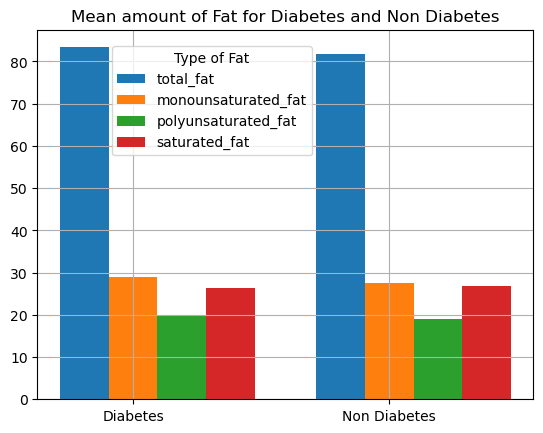

In [16]:
group_means = all_data_df.groupby('DIQ010').mean().iloc[:,4:]
positions = np.arange(len(group_means))
width = 0.19

fig, ax = plt.subplots()
ax.grid(True)
for i, column in enumerate(group_means.columns):
    ax.bar(positions + i * width, group_means[column], width=width, label=column)

    
ax.set_xticks(positions + width)
ax.set_xticklabels(['Diabetes', 'Non Diabetes'])
ax.set_title('Mean amount of Fat for Diabetes and Non Diabetes')

ax.legend(title='Type of Fat',loc=(.15,0.66))

In [18]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['total_fat']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['total_fat']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'total fats: T-statistic: {t_stat}, P-value: {p_value}')


total fats: T-statistic: 1.1106622566599345, P-value: 0.26689008438505285


In [19]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['polyunsaturated_fat']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['polyunsaturated_fat']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'polyunsaturated fat: T-statistic: {t_stat}, P-value: {p_value}')

polyunsaturated fat: T-statistic: 1.9442303116627393, P-value: 0.05205220270280318


In [20]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['monounsaturated_fat']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['monounsaturated_fat']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'monounsaturated fat: T-statistic: {t_stat}, P-value: {p_value}')

monounsaturated fat: T-statistic: 2.70239122386061, P-value: 0.0069619552966549165


In [21]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['saturated_fat']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['saturated_fat']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'saturated fat: T-statistic: {t_stat}, P-value: {p_value}')

saturated fat: T-statistic: -1.0546810119742482, P-value: 0.2917369785991942


In [22]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['total_sugars']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['total_sugars']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'total sugars: T-statistic: {t_stat}, P-value: {p_value}')

total sugars: T-statistic: -8.03281273272329, P-value: 1.8833579089454455e-15


In [23]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['total_carbs']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['total_carbs']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'total carbs: T-statistic: {t_stat}, P-value: {p_value}')

total carbs: T-statistic: -6.983177214947425, P-value: 4.240152843523737e-12


In [24]:
diabetics = all_data_df[all_data_df['DIQ010'] == 1]['total_protein']
non_diabetics = all_data_df[all_data_df['DIQ010'] == 2]['total_protein']

diabetics = diabetics.dropna()
non_diabetics = non_diabetics.dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(np.array(diabetics), np.array(non_diabetics), equal_var=False)
print(f'total_protein: T-statistic: {t_stat}, P-value: {p_value}')

total_protein: T-statistic: 2.1470410429825617, P-value: 0.0319464412873658


In [25]:
# randomly downselect from original data set 
df_majority = all_data_df[all_data_df['DIQ010'] == 2]
df_minority = all_data_df[all_data_df['DIQ010'] == 1]



In [26]:
df_majority_sampled = df_majority.sample(n=len(df_minority), random_state=42)

In [27]:
df_balanced = pd.concat([df_majority_sampled, df_minority], axis=0)
df_balanced

,SEQN,DIQ010,total_sugars,total_protein,total_carbs,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
11623,124486,2,46.94,57.97,140.82,40.06,11.675,10.805,14.112
3250,113612,2,291.26,85.44,577.52,131.22,44.241,38.442,37.196
8232,120131,2,107.07,51.84,187.46,39.18,10.955,14.684,9.647
3373,113769,2,77.76,51.69,129.85,27.19,8.335,5.625,9.402
8775,120844,2,96.31,62.75,162.10,52.22,15.245,14.646,17.238
...,...,...,...,...,...,...,...,...,...
11844,124778,1,212.53,76.35,357.11,61.23,21.978,15.006,17.871
11853,124788,1,81.63,99.74,276.26,158.71,53.171,57.414,35.389
11859,124796,1,83.77,46.04,191.21,66.88,28.907,8.111,23.160
11865,124803,1,30.78,63.58,163.83,71.99,21.730,22.430,22.083


In [28]:
fat_input = df_balanced.iloc[:,5:]
fat_targets = df_balanced.iloc[:,1:2]

In [29]:
fat_input

,total_fat,monounsaturated_fat,polyunsaturated_fat,saturated_fat
11623,40.06,11.675,10.805,14.112
3250,131.22,44.241,38.442,37.196
8232,39.18,10.955,14.684,9.647
3373,27.19,8.335,5.625,9.402
8775,52.22,15.245,14.646,17.238
...,...,...,...,...
11844,61.23,21.978,15.006,17.871
11853,158.71,53.171,57.414,35.389
11859,66.88,28.907,8.111,23.160
11865,71.99,21.730,22.430,22.083


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fat_input, fat_targets, test_size=0.2)

In [31]:
y_train

,DIQ010
9701,2
643,2
8107,1
3744,1
3446,1
...,...
1641,2
4029,1
11123,1
9801,2


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [33]:
svc_model = SVC()

svc_model.fit(X_train,y_train)

C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [34]:
yhat = svc_model.predict(X_test)

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection

In [36]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.55      0.37      0.44       242
           2       0.53      0.70      0.60       243

    accuracy                           0.53       485
   macro avg       0.54      0.53      0.52       485
weighted avg       0.54      0.53      0.52       485



In [ ]:
# next step plot the data to see if the data is linearly seperable 

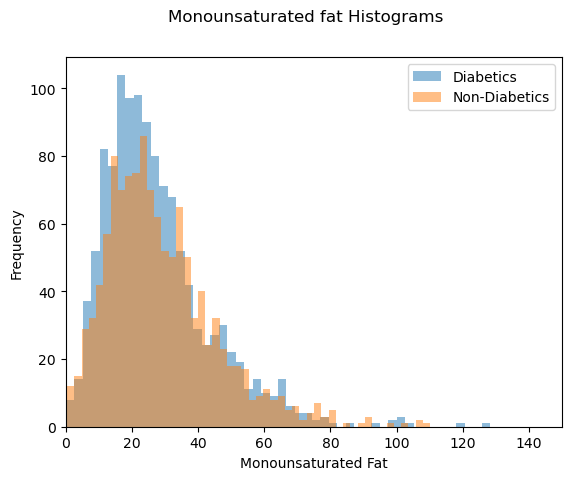

In [44]:
fig, ax = plt.subplots()

fig.suptitle('Monounsaturated fat Histograms')

ax.hist(fat_input.iloc[:1211,1], bins=50, alpha=0.5, label='Diabetics', bottom=0)

ax.hist(fat_input.iloc[1212:,1], bins=50, alpha=0.5, label='Non-Diabetics', bottom=0)

ax.set_xlim(0, 150)
ax.set_xlabel('Monounsaturated Fat')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

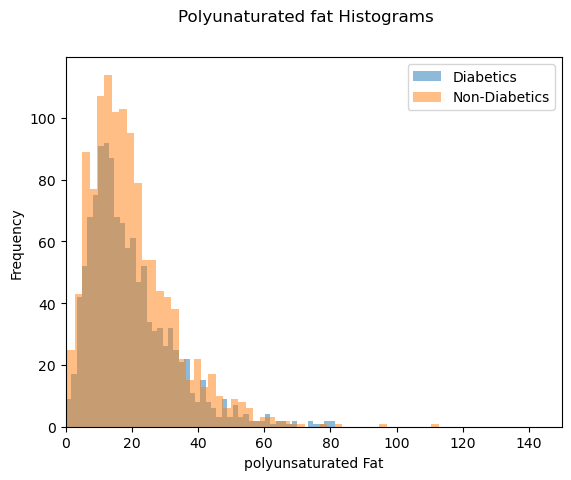

In [45]:
fig, ax = plt.subplots()

fig.suptitle('Polyunaturated fat Histograms')


ax.hist(fat_input.iloc[:1211,2], bins=50, alpha=0.5, label='Diabetics', bottom=0)

ax.hist(fat_input.iloc[1212:,2], bins=50, alpha=0.5, label='Non-Diabetics', bottom=0)

ax.set_xlim(0, 150)
ax.set_xlabel('polyunsaturated Fat')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

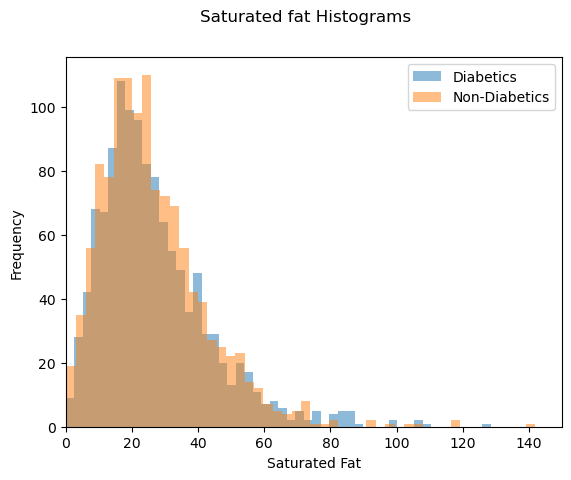

In [46]:
fig, ax = plt.subplots()

fig.suptitle('Saturated fat Histograms')

ax.hist(fat_input.iloc[:1211,3], bins=50, alpha=0.5, label='Diabetics', bottom=0)

ax.hist(fat_input.iloc[1212:,3], bins=50, alpha=0.5, label='Non-Diabetics', bottom=0)

ax.set_xlim(0, 150)
ax.set_xlabel('Saturated Fat')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

In [49]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# running grid search on best set of hyperparameters

param_grid = {
    'C': [1000, 10, 1],            
    'kernel': ['poly'], 
    'degree': [2, 5]            
}
svc = svm.SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(fat_input, fat_targets)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=2, kernel=poly; total time=   4.4s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=2, kernel=poly; total time=   4.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=2, kernel=poly; total time=   7.5s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=2, kernel=poly; total time=   4.8s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=2, kernel=poly; total time=   4.3s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=5, kernel=poly; total time=10.9min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=5, kernel=poly; total time=13.1min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=5, kernel=poly; total time=26.4min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=5, kernel=poly; total time=13.1min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, degree=5, kernel=poly; total time=18.0min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=5, kernel=poly; total time= 1.6min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=5, kernel=poly; total time=  57.0s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=5, kernel=poly; total time= 1.1min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=5, kernel=poly; total time= 1.8min


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, degree=5, kernel=poly; total time=  59.2s
[CV] END .........................C=1, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=2, kernel=poly; total time=   0.1s
[CV] END .........................C=1, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=2, kernel=poly; total time=   0.1s
[CV] END .........................C=1, degree=2, kernel=poly; total time=   0.1s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=5, kernel=poly; total time=   5.7s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=5, kernel=poly; total time=  11.9s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=5, kernel=poly; total time=  11.8s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=5, kernel=poly; total time=   6.5s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, degree=5, kernel=poly; total time=   4.9s


C:\Users\beali\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 1000, 'degree': 2, 'kernel': 'poly'}
Best score: 0.5288659793814433


In [51]:
grid_search.best_estimator_

SVC(C=1000, degree=2, kernel='poly')

In [5]:
results_df = pd.read_csv('diabetes_svm_gridsearch.csv')

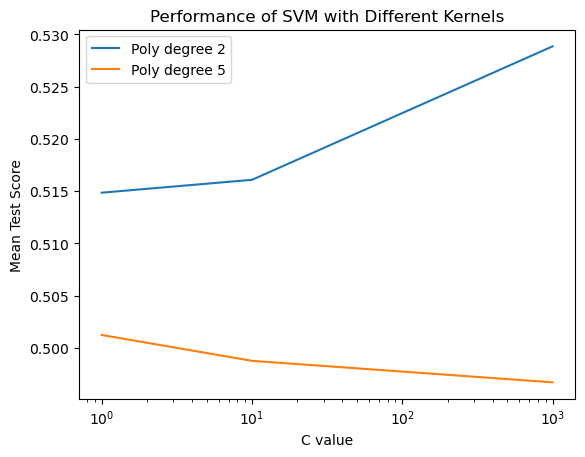

In [7]:
for kernel in ['poly', 'rbf']:
    subset = results_df[results_df['param_kernel'] == kernel]
    for degree in subset['param_degree'].unique():
        if kernel == 'poly':
            degree_subset = subset[subset['param_degree'] == degree]
            plt.plot(degree_subset['param_C'], degree_subset['mean_test_score'], label=f'Poly degree {degree}')
        else:
            plt.plot(subset['param_C'], subset['mean_test_score'], label=f'RBF', marker='o')

plt.xlabel('C value')
plt.ylabel('Mean Test Score')
plt.xscale('log')
plt.title('Performance of SVM with Different Kernels')
plt.legend()
plt.savefig('Performance of SVM.png')